In [22]:
# 載入基本套件
import pandas as pd
import numpy as np
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 讀取訓練與測試資料
data_path = 'C:/Users/Bopuc/Documents/Github/2nd-ML100Days/data/kaggle_data/'
train_data = pd.read_csv(data_path + 'train.csv',header = None)
test_data = pd.read_csv(data_path + 'test.csv',header = None)
train_label = pd.read_csv(data_path + 'trainLabels.csv',header = None)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.25, random_state=4)

x_train.shape,x_test.shape,y_train.shape,y_test.shape,test_data.shape

((750, 40), (250, 40), (750, 1), (250, 1), (9000, 40))

In [23]:
# RandomForest
# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20, max_depth=10)

# 訓練模型
clf.fit(x_train, y_train.values.ravel())

# 預測測試集
y_pred = clf.predict(x_test)

# 準確度
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.872


In [24]:
# GradientBoostingClassifier
# 建立模型
gclf = GradientBoostingClassifier()

# 訓練模型
gclf.fit(x_train, y_train.values.ravel())

# 預測測試集
y_pred = gclf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.892


In [25]:
# LogisticRegression
# 建立模型
lr = LogisticRegression()

# 訓練模型
lr.fit(x_train, y_train.values.ravel())

# 預測測試集
y_pred = lr.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.82


C:\Users\Bopuc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
# GradientBoostingClassifier預測檔
gclf.fit(x_train, y_train.values.ravel())
gclf_pred = gclf.predict_proba(test_data)[:,1]
sub = pd.DataFrame({'Solution': gclf_pred})
sub['Solution'] = sub['Solution'].map(lambda x:1 if x>0.5 else 0) 
sub.index +=1
sub['Id']=np.arange(1,sub.shape[0]+1)
sub=sub[['Id','Solution']]
sub.to_csv('test_gclf.csv', index=False)

In [27]:
test_data.shape[0]

9000

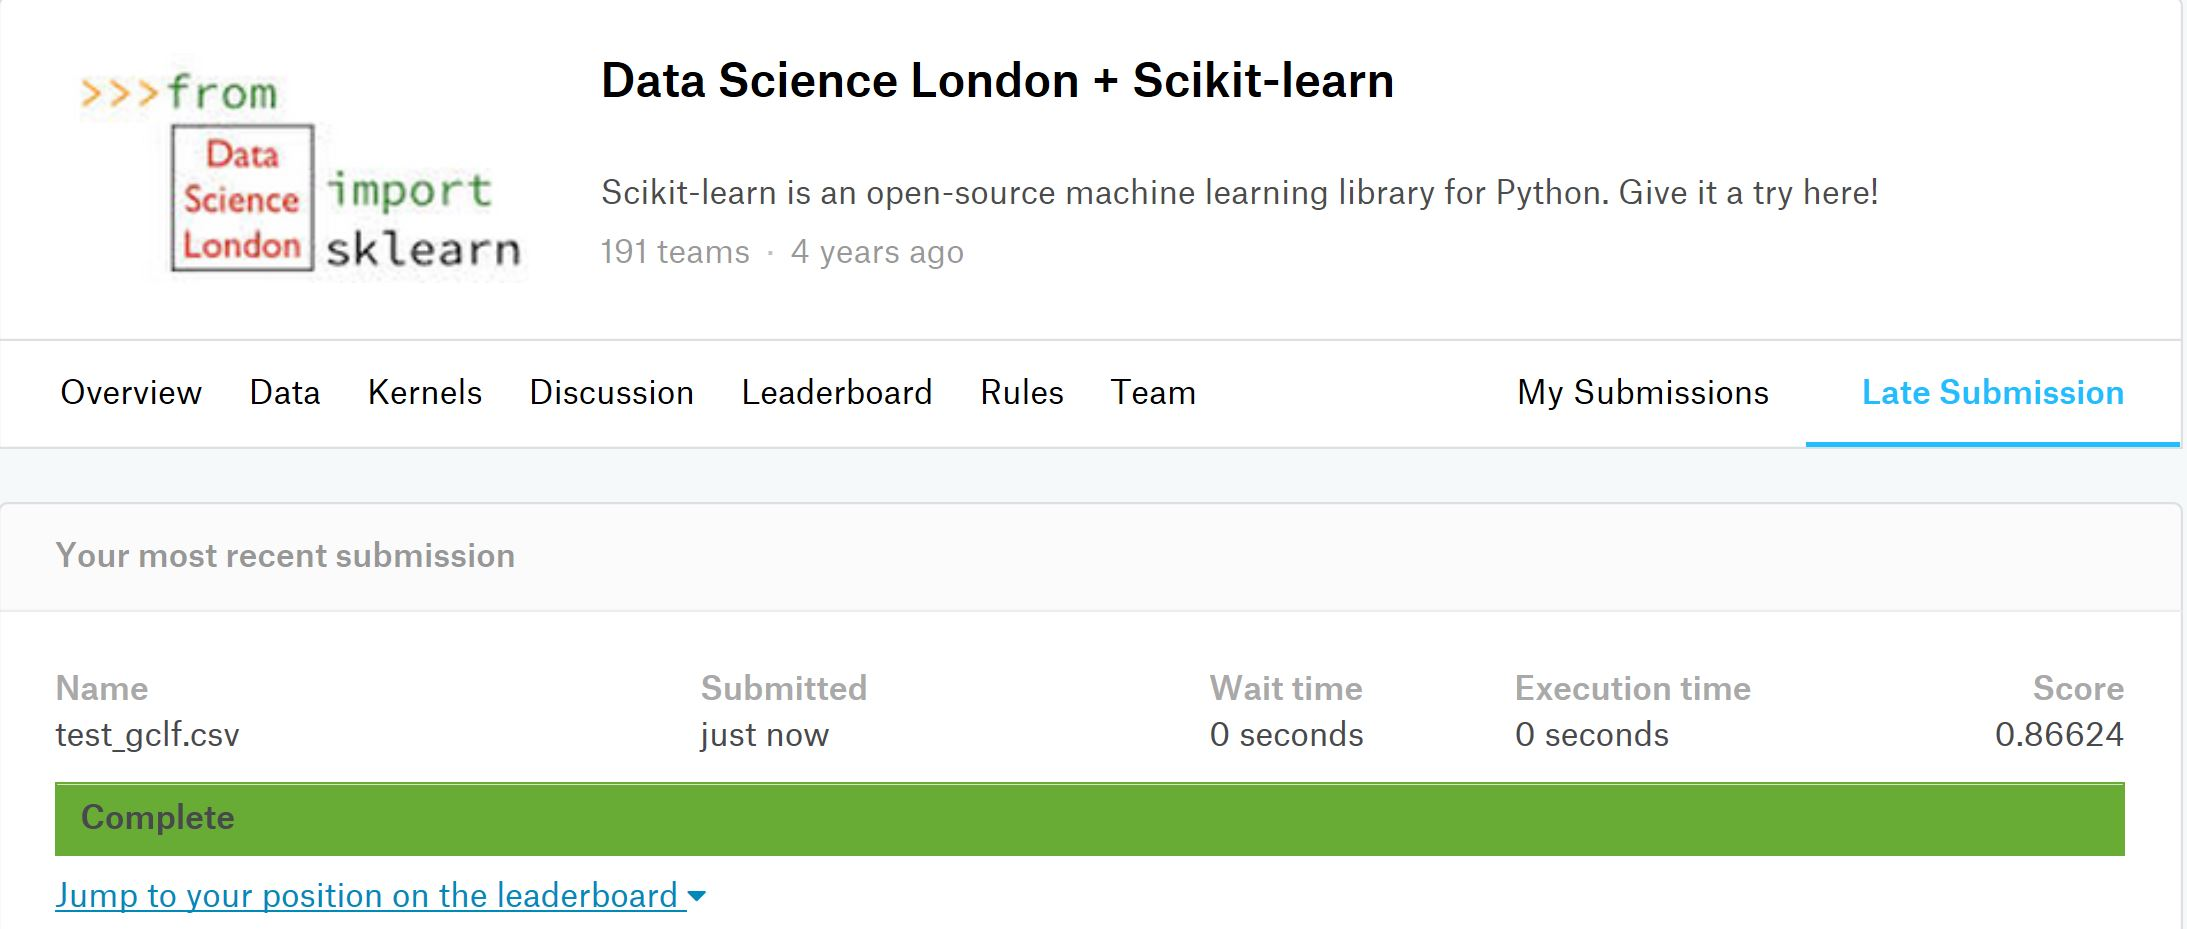